#  Data Analysis and Visualization of a Stock Market

####  Import necessary libraries

In [1]:
import numpy as np 
import pandas as pd
# Data Visulzation
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf # stock market lib
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

## a) download the required prices, set your test set (the last 20 prices) and training set (the rest prices);

In [79]:
### Loading the dataset

# Download data for a specific company from Yahoo Finance
symbol = "CRDA.L"  
start_date = "2020-03-02"
end_date = "2022-02-28"
data = yf.download(symbol, start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed


In [80]:
# Split the  competitor data into test and training sets
test_size = 20  # number of observations in test set
train_size = len(data) - test_size  # number of observations in training set
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [55]:
# Split the data into test and training sets
test_size = 20  # number of observations in test set
train_size = len(data) - test_size  # number of observations in training set
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [ ]:
## Read data from csv file and display first few rows

In [56]:
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,4634.0,4726.0,4562.000000,4690.0,4484.113770,752316
2020-03-03,4678.0,4821.0,4674.000000,4744.0,4535.743164,547703
2020-03-04,4770.0,4822.0,4706.000000,4706.0,4499.411621,670912
2020-03-05,4728.0,4756.0,4624.839844,4634.0,4430.571777,713986
2020-03-06,4534.0,4602.0,4420.000000,4470.0,4273.770508,767769


In [57]:
test_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31,7828.0,8014.000000,7806.000000,7972.0,7856.688477,519656
2022-02-01,7994.0,8144.000000,7830.799805,8008.0,7892.167969,798156
2022-02-02,8116.0,8214.000000,8082.000000,8196.0,8077.448730,314865
2022-02-03,8142.0,8151.788086,7786.000000,7810.0,7697.032227,567470
2022-02-04,7802.0,7884.000000,7694.000000,7730.0,7618.189453,436847


In [ ]:
# Since our time-frame of analysis is large, we can relax on number of decimal places to consider.

In [58]:
train_data = train_data.round(2)
train_data.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,4634.0,4726.0,4562.0,4690.0,4484.11,752316
2020-03-03,4678.0,4821.0,4674.0,4744.0,4535.74,547703


In [6]:
test_data = test_data.round(2)
test_data.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31,7828.0,8014.0,7806.0,7972.0,7856.69,519656
2022-02-01,7994.0,8144.0,7830.8,8008.0,7892.17,798156


In [8]:
# the shape of the dataset
print(train_data.shape,test_data.shape)

(483, 6) (20, 6)


#  check if the dataset has any null values

In [9]:
train_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
test_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2020-03-02 to 2022-02-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       503 non-null    float64
 1   High       503 non-null    float64
 2   Low        503 non-null    float64
 3   Close      503 non-null    float64
 4   Adj Close  503 non-null    float64
 5   Volume     503 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


In [59]:
# statistical analysis
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,483.000000,483.000000,483.000000,483.000000,483.000000,4.830000e+02
mean,6873.165631,6949.338551,6797.176315,6877.950311,6717.899379,3.985965e+05
std,1623.064049,1632.429854,1612.213477,1620.171813,1632.070569,2.619490e+05
min,3988.000000,4112.000000,3814.000000,4070.000000,3891.330000,4.647000e+03
25%,5905.000000,5997.000000,5860.000000,5915.000000,5755.730000,2.377520e+05
50%,6422.000000,6470.000000,6362.000000,6418.000000,6248.000000,3.208400e+05
75%,8209.000000,8382.000000,8106.000000,8266.000000,8145.455000,4.642550e+05
max,10445.000000,10505.000000,10285.000000,10410.000000,10259.420000,2.074017e+06


-- I’ll use the describe() function of Pandas to get high-level overview of how the CRDA'L stock performed in about last couple of months. last 90 train dataset

In [60]:
data.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,9045,9147,8923,9035,8904,446585
std,1063,1069,1067,1075,1059,276805
min,6860,7114,6860,6972,6871,43633
25%,8121,8156,7812,7981,7865,304396
50%,9486,9536,9355,9482,9344,391922
75%,9881,10041,9802,9916,9773,484681
max,10445,10505,10285,10410,10259,1789166


_ In last 90 days, the average closing price for CRDL stock was about 8904.
For about 75% of time the stock was trading below 9773 and it clocked maximum of 10259	. The maximum volume of shares traded on a single day was 1789166 with median quantity being 391922.


## demonstrate descriptive analysis on the prices and returns to investigate the trends and risks;

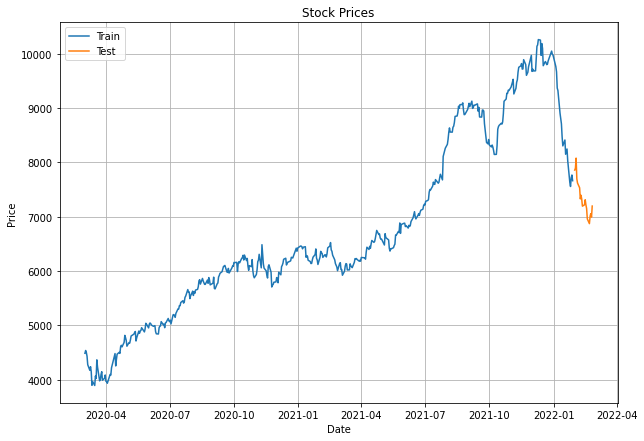

In [61]:
# Plot the stock prices
plt.figure(figsize=(10,7))
plt.plot(train_data["Adj Close"], label="Train")
plt.plot(test_data["Adj Close"], label="Test")
plt.grid(True)
plt.title("Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [62]:
# b) Descriptive analysis

# Calculate the daily returns for the company
daily_returns = data["Adj Close"].pct_change()*100

# Print summary statistics for the returns
print("Summary statistics for daily returns:")
print(daily_returns.describe())

Summary statistics for daily returns:
count    502.000000
mean       0.107230
std        1.614775
min       -6.042420
25%       -0.684855
50%        0.238103
75%        0.993382
max        8.511657
Name: Adj Close, dtype: float64


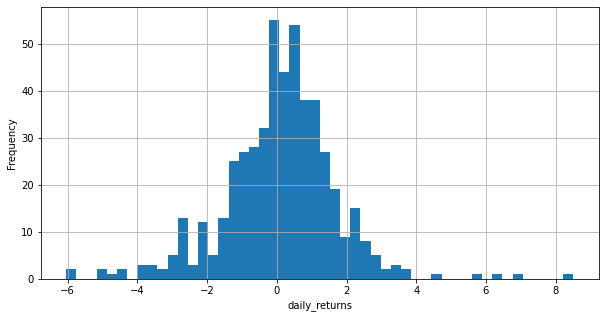

In [63]:
daily_returns.hist(bins = 50, figsize = (10,5)) 
plt.xlabel("daily_returns")
plt.ylabel("Frequency")
plt.show()

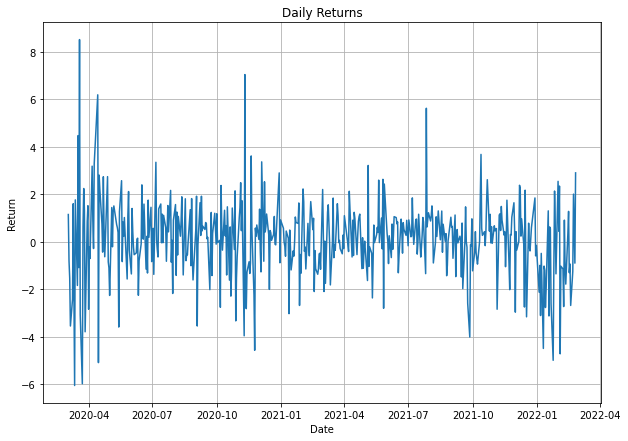

In [64]:
plt.figure(figsize=(10,7))
# Plot the daily returns
plt.plot(daily_returns)
plt.grid(True)
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.show()

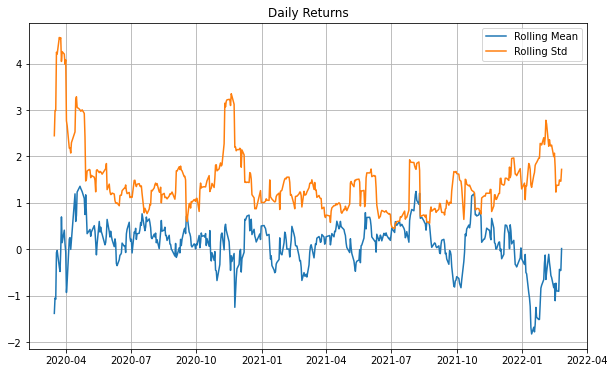

In [65]:


# Calculate the rolling mean and standard deviation of returns
rolling_mean = daily_returns.rolling(window=10).mean()
rolling_std = daily_returns.rolling(window=10).std()

# Plot the daily returns, rolling mean, and rolling standard deviation
plt.figure(figsize=(10, 6))
#plt.plot(daily_returns.index, daily_returns.values, label="Daily Returns")
plt.plot(rolling_mean.index, rolling_mean.values, label="Rolling Mean")
plt.plot(rolling_std.index, rolling_std.values, label="Rolling Std")
plt.grid(True)
plt.title("Daily Returns")
plt.legend()
plt.show()


## visualise the training set, demonstrate moving average crossover trading strategy on it, and estimate the returns of your strategy;

In [66]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,4634.0,4726.00,4562.00,4690.0,4484.11,752316
2020-03-03,4678.0,4821.00,4674.00,4744.0,4535.74,547703
2020-03-04,4770.0,4822.00,4706.00,4706.0,4499.41,670912
2020-03-05,4728.0,4756.00,4624.84,4634.0,4430.57,713986
2020-03-06,4534.0,4602.00,4420.00,4470.0,4273.77,767769
...,...,...,...,...,...,...
2022-01-24,8138.0,8170.00,7710.73,7742.0,7630.02,1572644
2022-01-25,7834.0,7834.00,7661.44,7666.0,7555.12,503767
2022-01-26,7700.0,7928.00,7648.00,7830.0,7716.74,936141


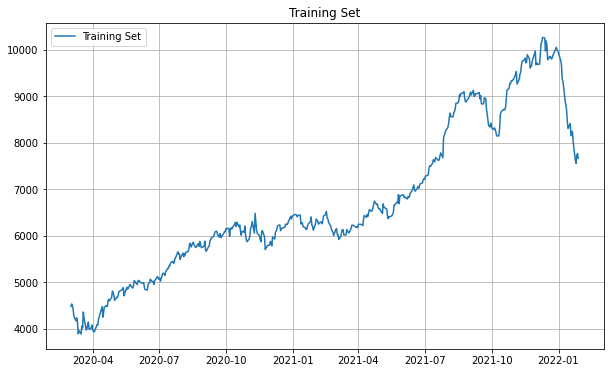

In [81]:
# Visualize the training set
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data["Adj Close"], label="Training Set")
plt.title("Training Set")
plt.legend()
plt.grid(True)
plt.show()

Total return of the strategy: 0.0031
Annual return of the strategy: 0.0016


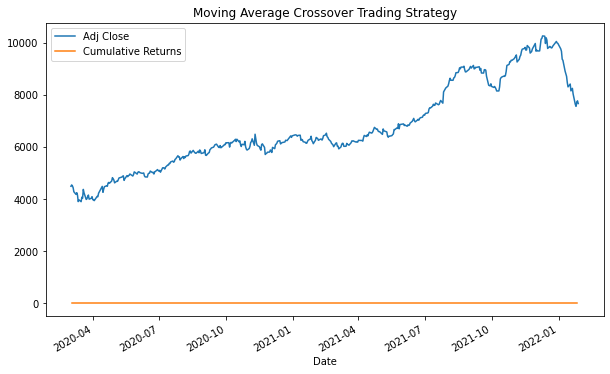

In [82]:
# c) Moving average crossover trading strategy
ma50 = train_data["Adj Close"].rolling(window=50).mean()
ma200 = train_data["Adj Close"].rolling(window=200).mean()
train_data["Signal"] = 0.0
train_data["Signal"][50:] = np.where(ma50[50:] > ma200[50:], 1.0, 0.0)
train_data["Position"] = train_data["Signal"].diff()
train_data["Returns"] = np.log(train_data["Adj Close"] / train_data["Adj Close"].shift(1))
train_data["Strategy Returns"] = train_data["Position"] * train_data["Returns"].shift(-1)
train_data["Cumulative Returns"] = train_data["Strategy Returns"].cumsum().apply(np.exp)
train_data[["Adj Close", "Cumulative Returns"]].plot(figsize=(10, 6), title="Moving Average Crossover Trading Strategy")

# Calculate the returns of the strategy
strategy_return = train_data["Strategy Returns"].sum()
strategy_annual_return = (np.exp(strategy_return / len(train_data)) - 1) * 252
print(f"Total return of the strategy: {strategy_return:.4f}")
print(f"Annual return of the strategy: {strategy_annual_return:.4f}")


In [84]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume,Signal,Position,Returns,Strategy Returns,Cumulative Returns
count,483.000000,483.000000,483.000000,483.000000,483.000000,4.830000e+02,483.000000,482.000000,482.000000,481.000000,481.000000
mean,6873.165631,6949.338618,6797.176274,6877.950311,6717.899622,3.985965e+05,0.587992,0.002075,0.001111,0.000007,1.001843
std,1623.064049,1632.429848,1612.213444,1620.171813,1632.070255,2.619490e+05,0.492707,0.045549,0.015975,0.000143,0.001543
min,3988.000000,4112.000000,3814.000000,4070.000000,3891.331055,4.647000e+03,0.000000,0.000000,-0.062327,-0.000000,1.000000
25%,5905.000000,5997.000000,5860.000000,5915.000000,5755.732422,2.377520e+05,0.000000,0.000000,-0.006283,0.000000,1.000000
50%,6422.000000,6470.000000,6362.000000,6418.000000,6247.995605,3.208400e+05,1.000000,0.000000,0.002389,0.000000,1.003133
75%,8209.000000,8382.000000,8106.000000,8266.000000,8145.450684,4.642550e+05,1.000000,0.000000,0.009885,0.000000,1.003133
max,10445.000000,10505.000000,10285.000000,10410.000000,10259.424805,2.074017e+06,1.000000,1.000000,0.081687,0.003128,1.003133


In [71]:


# Calculate the short-term and long-term moving averages
short_window = 
long_window = 50
short_ma = train_data["Adj Close"].rolling(window=short_window).mean()
long_ma = train_data["Adj Close"].rolling(window=long_window).mean()


In [72]:

# Create a new DataFrame for the signals
signals = pd.DataFrame(index=train_data.index)
signals["Signal"] = 0.0

# Generate the signals
signals["Signal"][short_window:] = np.where(short_ma[short_window:] > long_ma[short_window:], 1.0, 0.0)

# Calculate the positions based on the signals
positions = signals["Signal"].diff()


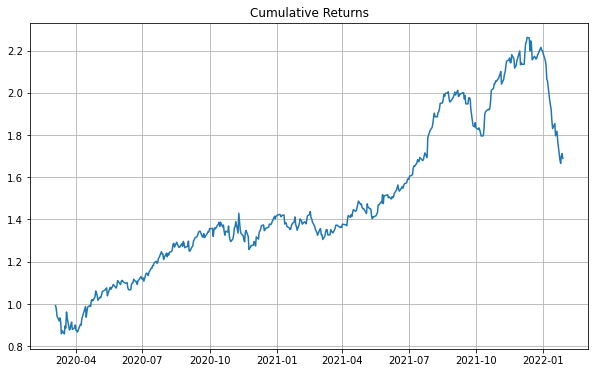

In [73]:
# c) Moving average crossover trading strategy


# Buy or sell based on the positions
num_shares = 1000  # asuming 1000 the number of shares to trade
portfolio = pd.DataFrame(index=train_data.index)
portfolio["Positions"] = positions
portfolio["Company"] = num_shares * train_data["Adj Close"]
portfolio["Cash"] = -1.0 * portfolio["Positions"] * train_data["Adj Close"]
portfolio["Total"] = portfolio["Company"] + portfolio["Cash"]
portfolio["Returns"] = portfolio["Total"].pct_change()

# Calculate the cumulative returns
cumulative_returns = (portfolio["Returns"] + 1).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns.index, cumulative_returns.values)
plt.grid(True)
plt.title("Cumulative Returns")
plt.show()




In [74]:
cumulative_returns.values

array([       nan,        nan, 0.99199028, 0.97681304, 0.94224316,
       0.91947731, 0.93423344, 0.91399639, 0.85877056, 0.8739456 ,
       0.85792616, 0.89629035, 0.88659403, 0.96205911, 0.93254684,
       0.87689771, 0.88237862, 0.90219237, 0.91399639, 0.87942651,
       0.88701513, 0.90050576, 0.87499945, 0.8731034 , 0.86698973,
       0.89460375, 0.90282512, 0.90029631, 0.93001803, 0.98756322,
       0.937395  , 0.96372808, 0.98504764, 0.99251059, 0.98824668,
       1.01532495, 1.02108146, 1.01468559, 1.03302217, 1.06137918,
       1.05242364, 1.04091063, 1.01745691, 1.03216895, 1.030037  ,
       1.04304259, 1.05881951, 1.06649632, 1.07289219, 1.07607894,
       1.03856482, 1.05178427, 1.07886255, 1.06990701, 1.07886255,
       1.08142222, 1.09250751, 1.07545186, 1.08739037, 1.11041859,
       1.10658018, 1.09165649, 1.1070079 , 1.11169732, 1.10913985,
       1.10316949, 1.09805236, 1.09933109, 1.10103754, 1.07630508,
       1.06777505, 1.06692183, 1.09250751, 1.09847787, 1.09975

In [75]:
cumulative_returns.mean()

1.4831286401180148

In [76]:
# Print the final portfolio value and returns
final_value = portfolio["Total"][-1]
total_returns = cumulative_returns[-1] - 1.0
print(f"Final portfolio value: {final_value:.2f}")
print(f"Total returns: {total_returns:.2f}")

Final portfolio value: 7661550.00
Total returns: 0.69


In [ ]:
# apply exponential smoothing techniques (single, double, Winter’s) on the training set to generate 20 forecasts, compare the forecasts with test set, and appraise the techniques comprehensively

In [5]:
from statsmodels.tsa.api import ExponentialSmoothing


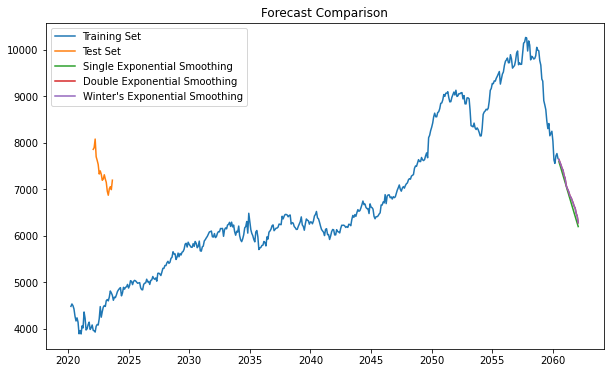

In [87]:
train_data.index = pd.date_range(start=train_data.index.min(), periods=len(train_data), freq='M')
train_data = train_data.resample('M').ffill()


test_data.index = pd.date_range(start=test_data.index.min(), periods=len(test_data), freq='M')
test_data = test_data.resample('M').ffill()

# Single exponential smoothing
model_single = ExponentialSmoothing(train_data["Adj Close"], trend="add", seasonal=None, ).fit()
forecast_single = model_single.forecast(20)

# Double exponential smoothing
model_double = ExponentialSmoothing(train_data["Adj Close"], trend="add", seasonal="add",freq="M").fit()
forecast_double = model_double.forecast(20)

# Winter's exponential smoothing
model_winter = ExponentialSmoothing(train_data["Adj Close"], trend="add",freq="M", seasonal="add", seasonal_periods=12).fit()
forecast_winter = model_winter.forecast(20)

# Compare the forecasts with the test set
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data["Adj Close"], label="Training Set")
plt.plot(test_data.index, test_data["Adj Close"], label="Test Set")
plt.plot(forecast_single.index, forecast_single.values, label="Single Exponential Smoothing")
plt.plot(forecast_double.index, forecast_double.values, label="Double Exponential Smoothing")
plt.plot(forecast_winter.index, forecast_winter.values, label="Winter's Exponential Smoothing")
plt.title("Forecast Comparison")
plt.legend()
plt.show()




In [88]:
# Appraise the techniques
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error (MAE) and mean squared error (MSE) for each technique
mae_single = mean_absolute_error(test_data["Adj Close"], forecast_single.values)
mse_single = mean_squared_error(test_data["Adj Close"], forecast_single.values)
mae_double = mean_absolute_error(test_data["Adj Close"], forecast_double.values)
mse_double = mean_squared_error(test_data["Adj Close"], forecast_double.values)
mae_winter = mean_absolute_error(test_data["Adj Close"], forecast_winter.values)
mse_winter = mean_squared_error(test_data["Adj Close"], forecast_winter.values)

# Print the MAE and MSE for each technique
print("Single Exponential Smoothing")
print(f"MAE: {mae_single:.2f}")
print(f"MSE: {mse_single:.2f}")
print("\nDouble Exponential Smoothing")
print(f"MAE: {mae_double:.2f}")
print(f"MSE: {mse_double:.2f}")
print("\nWinter's Exponential Smoothing")
print(f"MAE: {mae_winter:.2f}")
print(f"MSE: {mse_winter:.2f}")

Single Exponential Smoothing
MAE: 449.96
MSE: 240368.50

Double Exponential Smoothing
MAE: 358.15
MSE: 161203.97

Winter's Exponential Smoothing
MAE: 358.15
MSE: 161203.97


## investigate the relationships among the stock prices of your company and competitor/benchmark (e.g. regression and CAPM).

In [89]:
benchmark = "^FTSE"
start_date = "2020-03-02"
end_date = "2022-02-28"
df_benchmark = yf.download(benchmark, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [17]:
df_benchmark.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,6580.600098,6775.200195,6496.000000,6654.899902,6654.899902,1770844200
2020-03-03,6654.899902,6846.299805,6654.899902,6718.200195,6718.200195,1277190200
2020-03-04,6718.200195,6856.299805,6700.200195,6815.600098,6815.600098,1115783100
2020-03-05,6815.600098,6834.100098,6662.600098,6705.399902,6705.399902,1146893100
2020-03-06,6705.399902,6705.399902,6431.399902,6462.600098,6462.600098,1377953500


In [90]:
#Merge the data for the C and the benchmark
merged_data = pd.merge(data["Adj Close"], df_benchmark["Adj Close"], left_index=True, right_index=True)
merged_data.columns = ["CRDA.L", "^FTSE"]

#Calculate the returns for the company and the benchmark
merged_data["CRDA.L Returns"] = merged_data["CRDA.L"].pct_change()
merged_data["^FTSE Returns"] = merged_data["^FTSE"].pct_change()

<AxesSubplot: title={'center': 'Returns'}, xlabel='Date'>

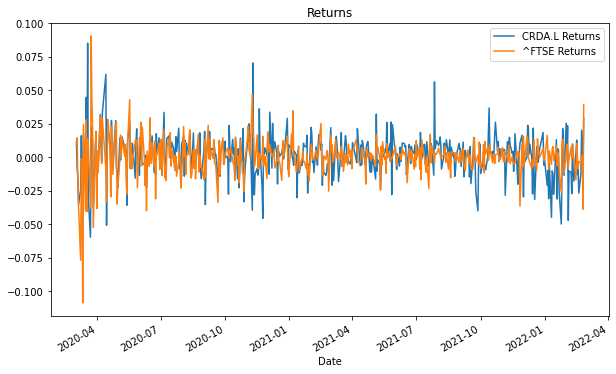

In [91]:
#Drop the first row since it contains NaN
merged_data = merged_data.dropna()

#Plot the returns of the company and the benchmark
merged_data[["CRDA.L Returns", "^FTSE Returns"]].plot(figsize=(10, 6), title="Returns")

In [20]:
import statsmodels.api as sm
from scipy import stats


In [92]:
#Regression analysis
X = sm.add_constant(merged_data["^FTSE Returns"])
model = sm.OLS(merged_data["CRDA.L Returns"], X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:         CRDA.L Returns   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     122.7
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           1.19e-25
Time:                        15:31:58   Log-Likelihood:                 1411.3
No. Observations:                 501   AIC:                            -2819.
Df Residuals:                     499   BIC:                            -2810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0009      0.001      1.396

In [23]:
#Calculate the CAPM parameters
beta = model.params[1]
risk_free_rate = 0.01 # replace with the current risk-free rate
market_return = merged_data["Benchmark Returns"].mean()
expected_return = risk_free_rate + beta * (market_return - risk_free_rate)
print(f"Beta: {beta:.4f}")
print(f"Expected return: {expected_return:.4f}")

Beta: 0.5028
Expected return: 0.0051


In [24]:
# Define the variables
risk_free_rate = 0.02
expected_market_return = 0.08

# Calculate the expected return of our company
expected_return_company = risk_free_rate + beta * (expected_market_return - risk_free_rate)

# Calculate the expected return of the benchmark
expected_return_benchmark = expected_market_return

print('Expected return of the company:', expected_return_company)
print('Expected return of the benchmark:', expected_return_benchmark)


Expected return of the company: 0.05016547299052376
Expected return of the benchmark: 0.08
